# 1. Perform EDA and do any data preprocessing required.

Male images: 6323
Female images: 5202


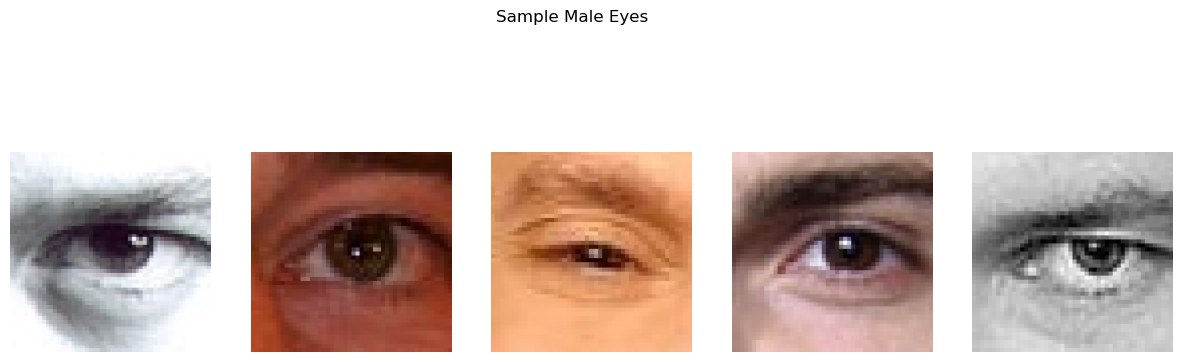

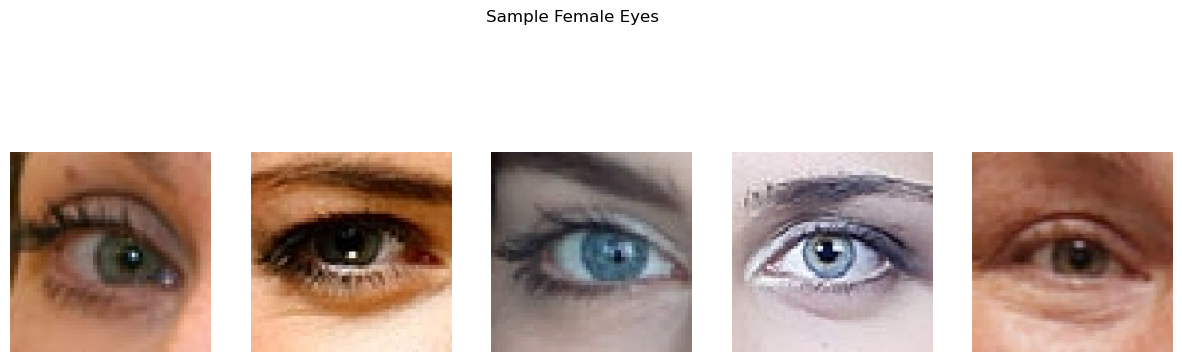

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, load_img

# Directory paths
base_dir = 'C:/Users/joojo/Downloads/ruskino_data'
male_dir = os.path.join(base_dir, 'maleeyes')
female_dir = os.path.join(base_dir, 'femaleeyes')

# Inspect image sizes and counts
print(f"Male images: {len(os.listdir(male_dir))}")
print(f"Female images: {len(os.listdir(female_dir))}")

# Visualize some sample images
def show_samples(directory, title):
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    for ax, img_file in zip(axes, os.listdir(directory)[:5]):
        img_path = os.path.join(directory, img_file)
        img = load_img(img_path, target_size=(150, 150))
        ax.imshow(img)
        ax.axis('off')
    plt.suptitle(title)
    plt.show()

show_samples(male_dir, "Sample Male Eyes")
show_samples(female_dir, "Sample Female Eyes")


# 2. Implement Classification Models:

**Model 1: Benchmark Model (SVM or KNN)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load images and labels
def load_data(directory):
    data = []
    labels = []
    for label, folder in enumerate([male_dir, female_dir]):
        for img_file in os.listdir(folder):
            img_path = os.path.join(folder, img_file)
            img = image.load_img(img_path, target_size=(150, 150))
            img_array = img_to_array(img)
            data.append(img_array)
            labels.append(label)
    return np.array(data), np.array(labels)

data, labels = load_data(base_dir)
data = data / 255.0  # Normalize

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Flatten images for SVM/KNN
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")

# KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy * 100:.2f}%")


**Model 2: Multilayer Perceptron (MLP)**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# MLP Model
model_mlp = Sequential([
    Flatten(input_shape=(150, 150, 3)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_mlp.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model_mlp.summary()

# Train the model
model_mlp.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
mlp_loss, mlp_accuracy = model_mlp.evaluate(X_test, y_test)
print(f"MLP Model Accuracy: {mlp_accuracy * 100:.2f}%")


**Model 3: Convolutional Neural Network (CNN)**

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential

# CNN Model
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_cnn.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model_cnn.summary()

# Train the model
model_cnn.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))
cnn_loss, cnn_accuracy = model_cnn.evaluate(X_test, y_test)
print(f"CNN Model Accuracy: {cnn_accuracy * 100:.2f}%")


**D:**

**Data Preprocessing and Augmentation**


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Paths to the data directories
train_dir = '/content/ruskino_data'
val_dir = '/content/archive'

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only rescaling for validation data
val_datagen = ImageDataGenerator(rescale=1./255)

# Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


**Model 2: MLP**

In [ ]:
# MLP Model
mlp_model = Sequential([
    Flatten(input_shape=(150, 150, 3)),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

mlp_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training MLP model
mlp_history = mlp_model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stopping]
)


**Model 3: Convolutional Neural Network (CNN)**

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Paths to the data directories
train_dir = '/content/ruskino_data'
val_dir = '/content/archive'

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only rescaling for validation data
val_datagen = ImageDataGenerator(rescale=1./255)

# Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# CNN Model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training CNN model
cnn_history = cnn_model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

# Function to plot training and validation metrics
def plot_metrics(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title(title + ' - Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title(title + ' - Training and Validation Loss')
    plt.legend()

    plt.show()

# Plotting metrics for CNN Model
plot_metrics(cnn_history, 'CNN Model')



**Plotting Training and Validation Metrics**


In [ ]:
# Function to plot training and validation metrics
def plot_metrics(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title(title + ' - Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title(title + ' - Training and Validation Loss')
    plt.legend()

    plt.show()

# Plotting metrics for MLP Model
plot_metrics(mlp_history, 'MLP Model')

# Plotting metrics for CNN Model
plot_metrics(cnn_history, 'CNN Model')


# 3. For each model show the performance metrics (accuracy, precision, recall). You can use classification report from sklearn



**Data Preprocessing and Augmentation**

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

# Paths to the data directories
train_dir = '/content/ruskino_data'
val_dir = '/content/archive'

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only rescaling for validation data
val_datagen = ImageDataGenerator(rescale=1./255)

# Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


**Model 2: Multilayer Perceptron (MLP)**

In [ ]:
# MLP Model
mlp_model = Sequential([
    Flatten(input_shape=(150, 150, 3)),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

mlp_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training MLP model
mlp_history = mlp_model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

# Plotting metrics for MLP Model
plot_metrics(mlp_history, 'MLP Model')

# Evaluating the MLP model
val_generator.reset()
mlp_predictions = mlp_model.predict(val_generator)
mlp_predictions = (mlp_predictions > 0.5).astype(int)
mlp_report = classification_report(val_generator.classes, mlp_predictions, target_names=['Female', 'Male'])
print('MLP Model Classification Report:\n', mlp_report)


**Model 3: Convolutional Neural Network (CNN)**

In [ ]:
# CNN Model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Training CNN model
cnn_history = cnn_model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

# Plotting metrics for CNN Model
plot_metrics(cnn_history, 'CNN Model')

# Evaluating the CNN model
val_generator.reset()
cnn_predictions = cnn_model.predict(val_generator)
cnn_predictions = (cnn_predictions > 0.5).astype(int)
cnn_report = classification_report(val_generator.classes, cnn_predictions, target_names=['Female', 'Male'])
print('CNN Model Classification Report:\n', cnn_report)


**Additionally, you need the benchmark model using SVM or KNN from sklearn:**

**Model 1: Benchmark Model (SVM)**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Load and preprocess images
def load_images_from_directory(directory, target_size=(150, 150)):
    images = []
    labels = []
    for label, class_dir in enumerate(os.listdir(directory)):
        class_dir_path = os.path.join(directory, class_dir)
        for img_name in os.listdir(class_dir_path):
            img_path = os.path.join(class_dir_path, img_name)
            img = load_img(img_path, target_size=target_size)
            img_array = img_to_array(img)
            img_array = img_array / 255.0
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)

train_images, train_labels = load_images_from_directory(train_dir)
val_images, val_labels = load_images_from_directory(val_dir)

# Flatten images for SVM
train_images_flat = train_images.reshape(len(train_images), -1)
val_images_flat = val_images.reshape(len(val_images), -1)

# SVM Model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(train_images_flat, train_labels)

# Predictions and Classification Report
svm_predictions = svm_model.predict(val_images_flat)
svm_report = classification_report(val_labels, svm_predictions, target_names=['Female', 'Male'])
print('SVM Model Classification Report:\n', svm_report)
